# Importing Libraries

In [1]:
#Importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.utils.class_weight import compute_sample_weight
pd.set_option('display.max_columns', None)

# Importing Data Set

In [2]:
ccdcs = pd.read_excel("default_of_credit_card_clients_0.xlsx")

In [3]:
ccdcs.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,0,0,0,0,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,0,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,0,0,0,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


# Data Understanding

In [4]:
#ID: Unique identifier for each credit card holder
#LIMIT_BAL: Amount of credit granted (in NT dollar)
#SEX: Gender of the cardholder (1 = male, 2 = female)
#EDUCATION: Educational background of the cardholder (1 = graduate school, 2 = university, 3 = high school, 4 = others)
#MARRIAGE: Marital status of the cardholder (1 = married, 2 = single, 3 = others)
#AGE: Age of the cardholder
#PAY_0: Repayment status in September 2005
#PAY_2: Repayment status in August 2005
#PAY_3: Repayment status in July 2005
#PAY_4: Repayment status in June 2005
#PAY_5: Repayment status in May 2005
#PAY_6: Repayment status in April 2005
#BILL_AMT1: Amount of bill statement in September 2005 (NT dollar)
#BILL_AMT2: Amount of bill statement in August 2005 (NT dollar)
#BILL_AMT3: Amount of bill statement in July 2005 (NT dollar)
#BILL_AMT4: Amount of bill statement in June 2005 (NT dollar)
#BILL_AMT5: Amount of bill statement in May 2005 (NT dollar)
#BILL_AMT6: Amount of bill statement in April 2005 (NT dollar)
#PAY_AMT1: Amount of previous payment in September 2005 (NT dollar)
#PAY_AMT2: Amount of previous payment in August 2005 (NT dollar)
#PAY_AMT3: Amount of previous payment in July 2005 (NT dollar)
#PAY_AMT4: Amount of previous payment in June 2005 (NT dollar)
#PAY_AMT5: Amount of previous payment in May 2005 (NT dollar)
#PAY_AMT6: Amount of previous payment in April 2005 (NT dollar)
#default payment next month: Binary variable indicating default payment next month (1 = Yes, 0 = No)

In [5]:
#Checking null values column wise
ccdcs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [6]:
ccdcs.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [7]:
# Checking unique values in each and every column
for col in ccdcs.columns:
    print(ccdcs[col].unique())

[    1     2     3 ... 29998 29999 30000]
[  20000  120000   90000   50000  500000  100000  140000  200000  260000
  630000   70000  250000  320000  360000  180000  130000  450000   60000
  230000  160000  280000   10000   40000  210000  150000  380000  310000
  400000   80000  290000  340000  300000   30000  240000  470000  480000
  350000  330000  110000  420000  170000  370000  270000  220000  190000
  510000  460000  440000  410000  490000  390000  580000  600000  620000
  610000  700000  670000  680000  430000  550000  540000 1000000  530000
  710000  560000  520000  750000  640000   16000  570000  590000  660000
  720000  327680  740000  800000  760000  690000  650000  780000  730000]
[2 1]
[2 1 3 5 4 6 0]
[1 2 3 0]
[24 26 34 37 57 29 23 28 35 51 41 30 49 39 40 27 47 33 32 54 58 22 25 31
 46 42 43 45 56 44 53 38 63 36 52 48 55 60 50 75 61 73 59 21 67 66 62 70
 72 64 65 71 69 68 79 74]
[2 0 1 3 4 8 7 5 6]
[2 0 3 5 7 4 1 6 8]
[0 2 3 4 6 7 1 5 8]
[0 2 3 4 5 7 6 1 8]
[0 2 3 5 4 7 8 6

In [8]:
# Analyzing trend on outstanding amount for the bank
bill_columns = ccdcs.columns[12:18]
ccdcs['Total_Bill_Amount'] = ccdcs[bill_columns].sum(axis=1)

In [9]:
ccdcs['Total_Bill_Amount'].head()

0      7704
1     17077
2    101653
3    231334
4    109339
Name: Total_Bill_Amount, dtype: int64

# Data Visualization

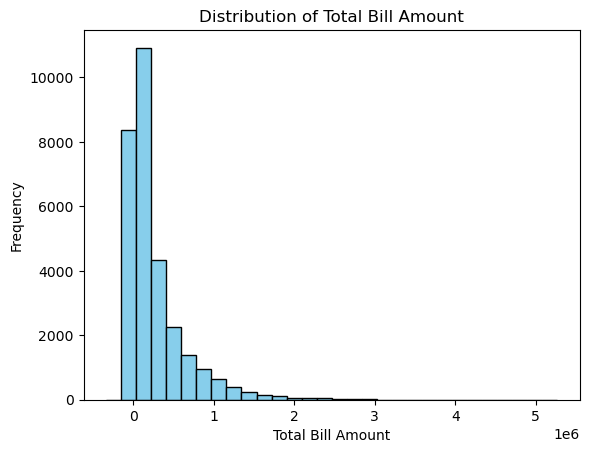

In [10]:
# Plotting trend amount for the bank
plt.hist(ccdcs['Total_Bill_Amount'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Total Bill Amount')
plt.xlabel('Total Bill Amount')
plt.ylabel('Frequency')
plt.show()

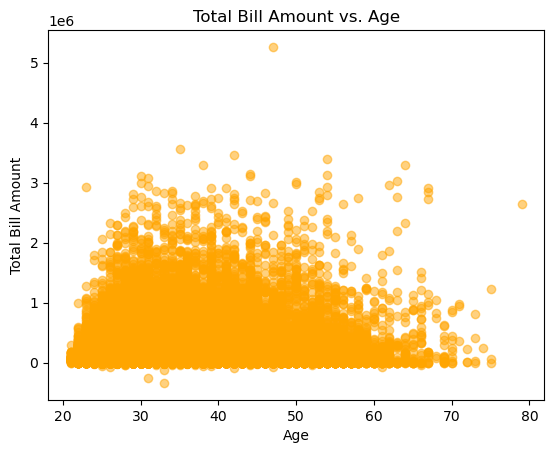

In [11]:
plt.scatter(ccdcs['AGE'], ccdcs['Total_Bill_Amount'], color='orange', alpha=0.5)
plt.title('Total Bill Amount vs. Age')
plt.xlabel('Age')
plt.ylabel('Total Bill Amount')
plt.show()

C:\Users\Tarun\AppData\Local\Temp\ipykernel_15820\2184070451.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='ID', y='Total_Bill_Amount', data=ccdcs, ci=None)


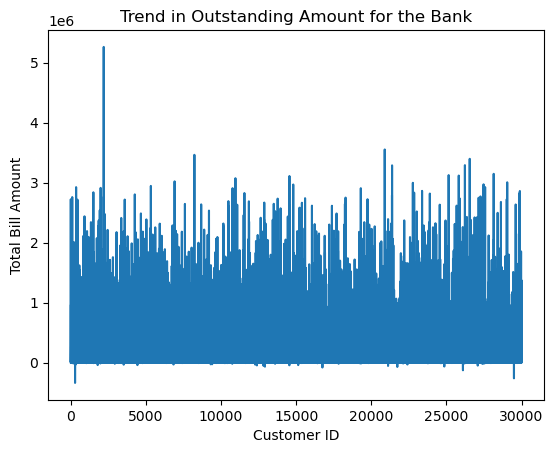

In [12]:
sns.lineplot(x='ID', y='Total_Bill_Amount', data=ccdcs, ci=None)
plt.title('Trend in Outstanding Amount for the Bank')
plt.xlabel('Customer ID')
plt.ylabel('Total Bill Amount')
plt.show()

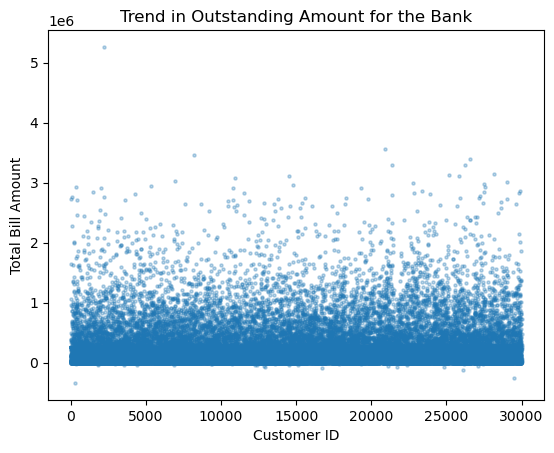

In [13]:
sns.regplot(x='ID', y='Total_Bill_Amount', data=ccdcs, scatter_kws={'s': 5, 'alpha': 0.3})
plt.title('Trend in Outstanding Amount for the Bank')
plt.xlabel('Customer ID')
plt.ylabel('Total Bill Amount')
plt.show()

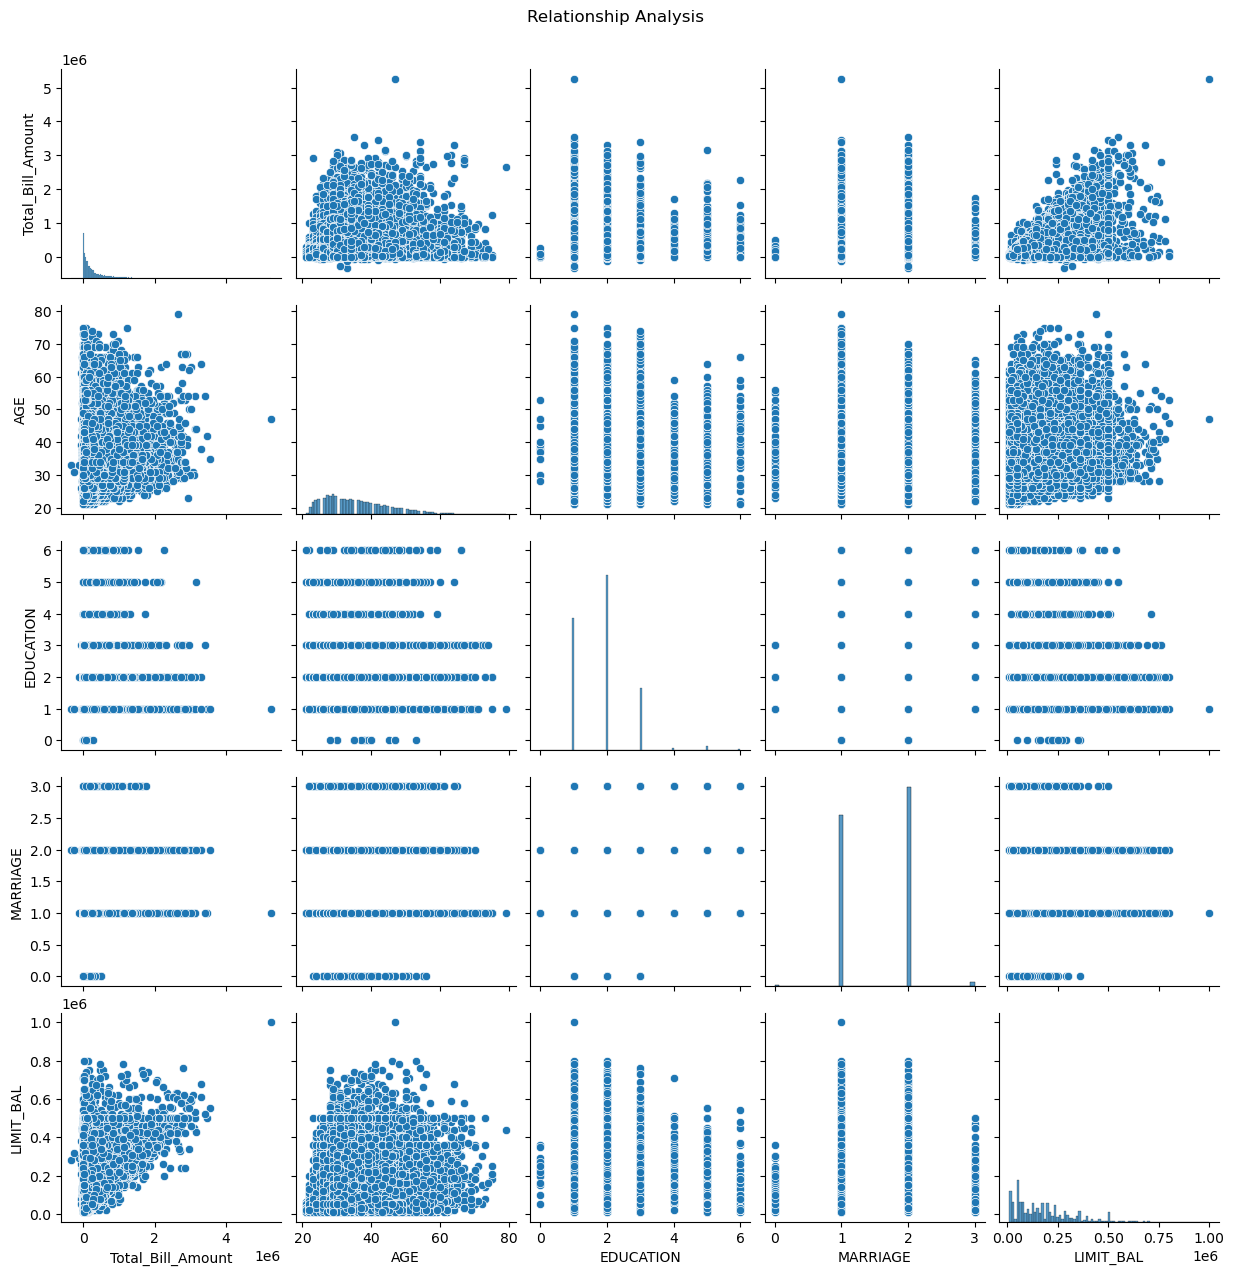

In [14]:
# Relationship between outstanding amount/trend with age, education, marriage, credit limit
sns.pairplot(ccdcs, vars=['Total_Bill_Amount', 'AGE', 'EDUCATION', 'MARRIAGE', 'LIMIT_BAL'])
plt.suptitle('Relationship Analysis', y=1.02)
plt.show()

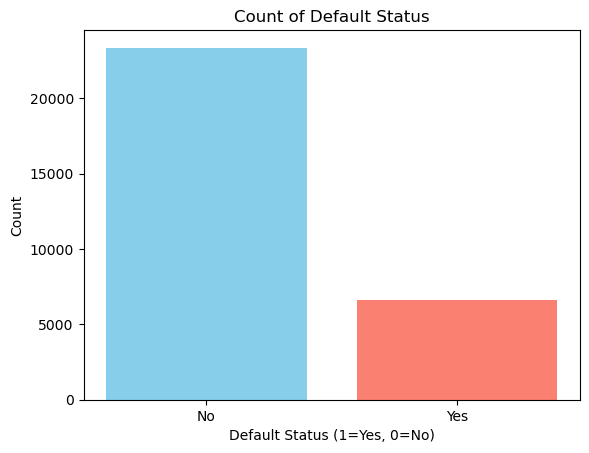

In [15]:
default_counts = ccdcs['default payment next month'].value_counts()
plt.bar(default_counts.index, default_counts.values, color=['skyblue', 'salmon'])
plt.title('Count of Default Status')
plt.xlabel('Default Status (1=Yes, 0=No)')
plt.ylabel('Count')
plt.xticks(default_counts.index, ['No', 'Yes'])
plt.show()

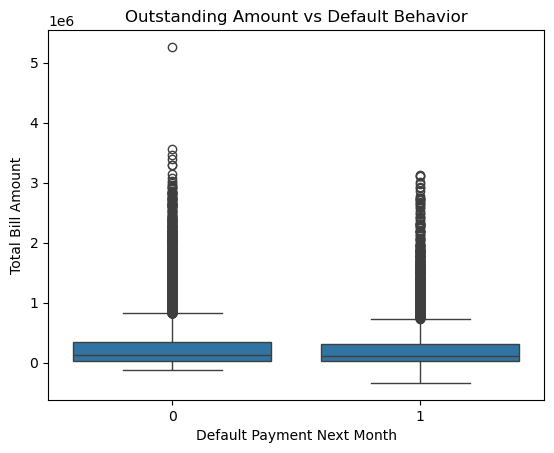

In [16]:
# outstanding amount/trend affect default behavior in the next month
sns.boxplot(x='default payment next month', y='Total_Bill_Amount', data=ccdcs)
plt.title('Outstanding Amount vs Default Behavior')
plt.xlabel('Default Payment Next Month')
plt.ylabel('Total Bill Amount')
plt.show()

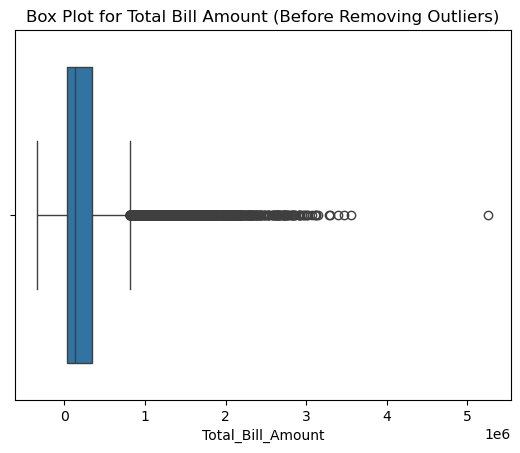

In [17]:
# Before removing outliers
sns.boxplot(x=ccdcs['Total_Bill_Amount'])
plt.title('Box Plot for Total Bill Amount (Before Removing Outliers)')
plt.show()

# Outlier Treatment

In [18]:
# cleaning the errors(values outside 3 standard deviations)
threshold = 3 * ccdcs['Total_Bill_Amount'].std()
ccdcs_cleaned = ccdcs[ccdcs['Total_Bill_Amount'].abs() < threshold]

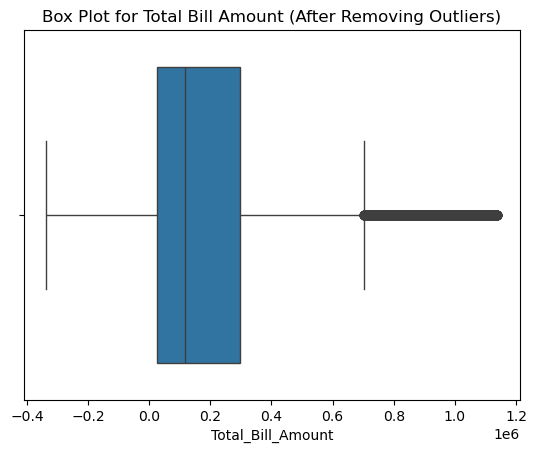

In [19]:
# After removing outliers
sns.boxplot(x=ccdcs_cleaned['Total_Bill_Amount'])
plt.title('Box Plot for Total Bill Amount (After Removing Outliers)')
plt.show()

In [20]:
# EDA-descriptive statistics
desc_stats = ccdcs.describe()
desc_stats

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,Total_Bill_Amount
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,0.356767,0.320033,0.304067,0.258767,0.22150,0.226567,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200,2.698617e+05
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,0.760594,0.801727,0.790589,0.761113,0.71772,0.715438,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062,3.795643e+05
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000,-3.362590e+05
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000,2.868800e+04
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000,1.263110e+05
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000,3.426265e+05
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.00000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000,5.263883e+06


In [21]:
# Confidence interval
import scipy
import scipy.stats as stats
CI = scipy.stats.norm.interval(0.95, loc=ccdcs['Total_Bill_Amount'].mean(), scale=ccdcs['Total_Bill_Amount'].std())
print("Confidence-Interval:", CI)

Confidence-Interval: (-474070.7476942262, 1013794.0900942262)


In [22]:
# Hypothesis testing
t_stat, p_value = scipy.stats.ttest_ind(ccdcs['Total_Bill_Amount'][ccdcs['default payment next month'] == 0],
                                        ccdcs['Total_Bill_Amount'][ccdcs['default payment next month'] == 1])


In [23]:
print("t-test:", t_stat)
print("P-value:", p_value)

t-test: 2.198311785010322
P-value: 0.02793450494078628


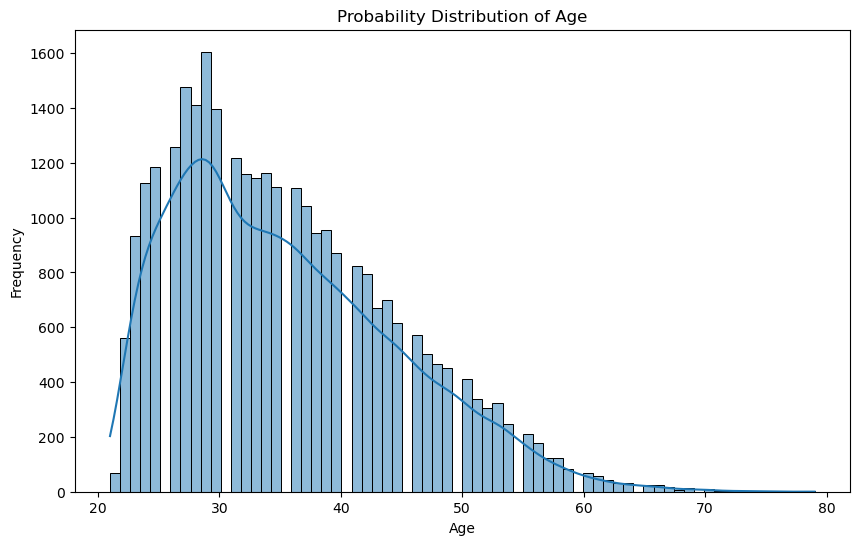

In [24]:
# Probability Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(ccdcs['AGE'], kde=True)
plt.title('Probability Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Label Encoding

In [25]:
from sklearn.preprocessing import LabelEncoder

# Initializing LabelEncoder
label_encoder = LabelEncoder()

# Fit and transforming the 'SEX' column
ccdcs['SEX'] = label_encoder.fit_transform(ccdcs['SEX'])

In [26]:
ccdcs.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,Total_Bill_Amount
0,1,20000,1,2,1,24,2,2,0,0,0,0,3913,3102,689,0,0,0,0,689,0,0,0,0,1,7704
1,2,120000,1,2,2,26,0,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,17077
2,3,90000,1,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,101653
3,4,50000,1,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,231334
4,5,50000,0,2,1,57,0,0,0,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,109339


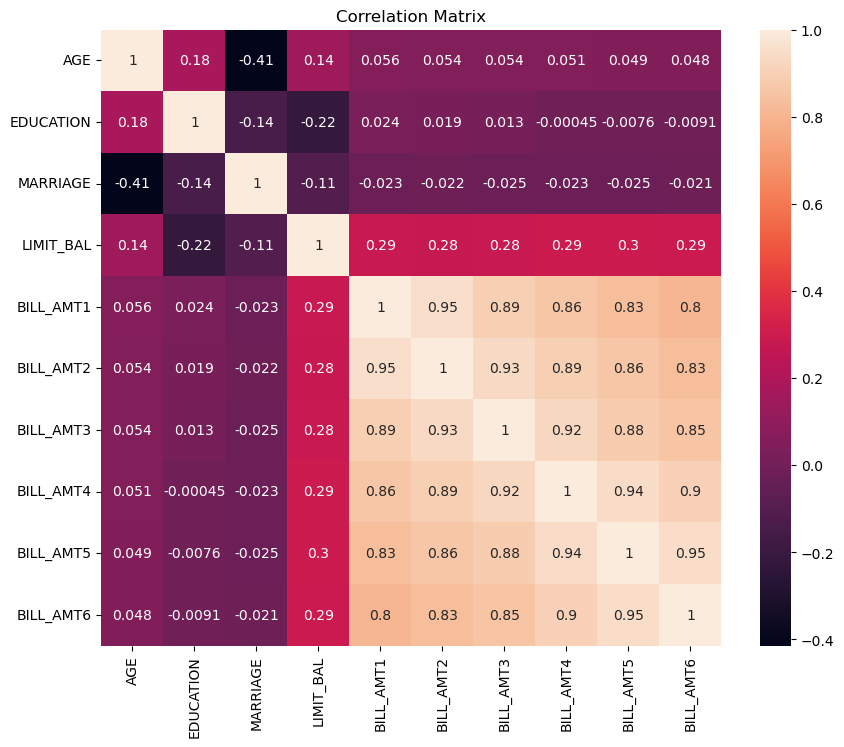

In [27]:
# Checking Correlation
plt.figure(figsize=(10, 8))
sns.heatmap(ccdcs[['AGE', 'EDUCATION', 'MARRIAGE', 'LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

<Axes: >

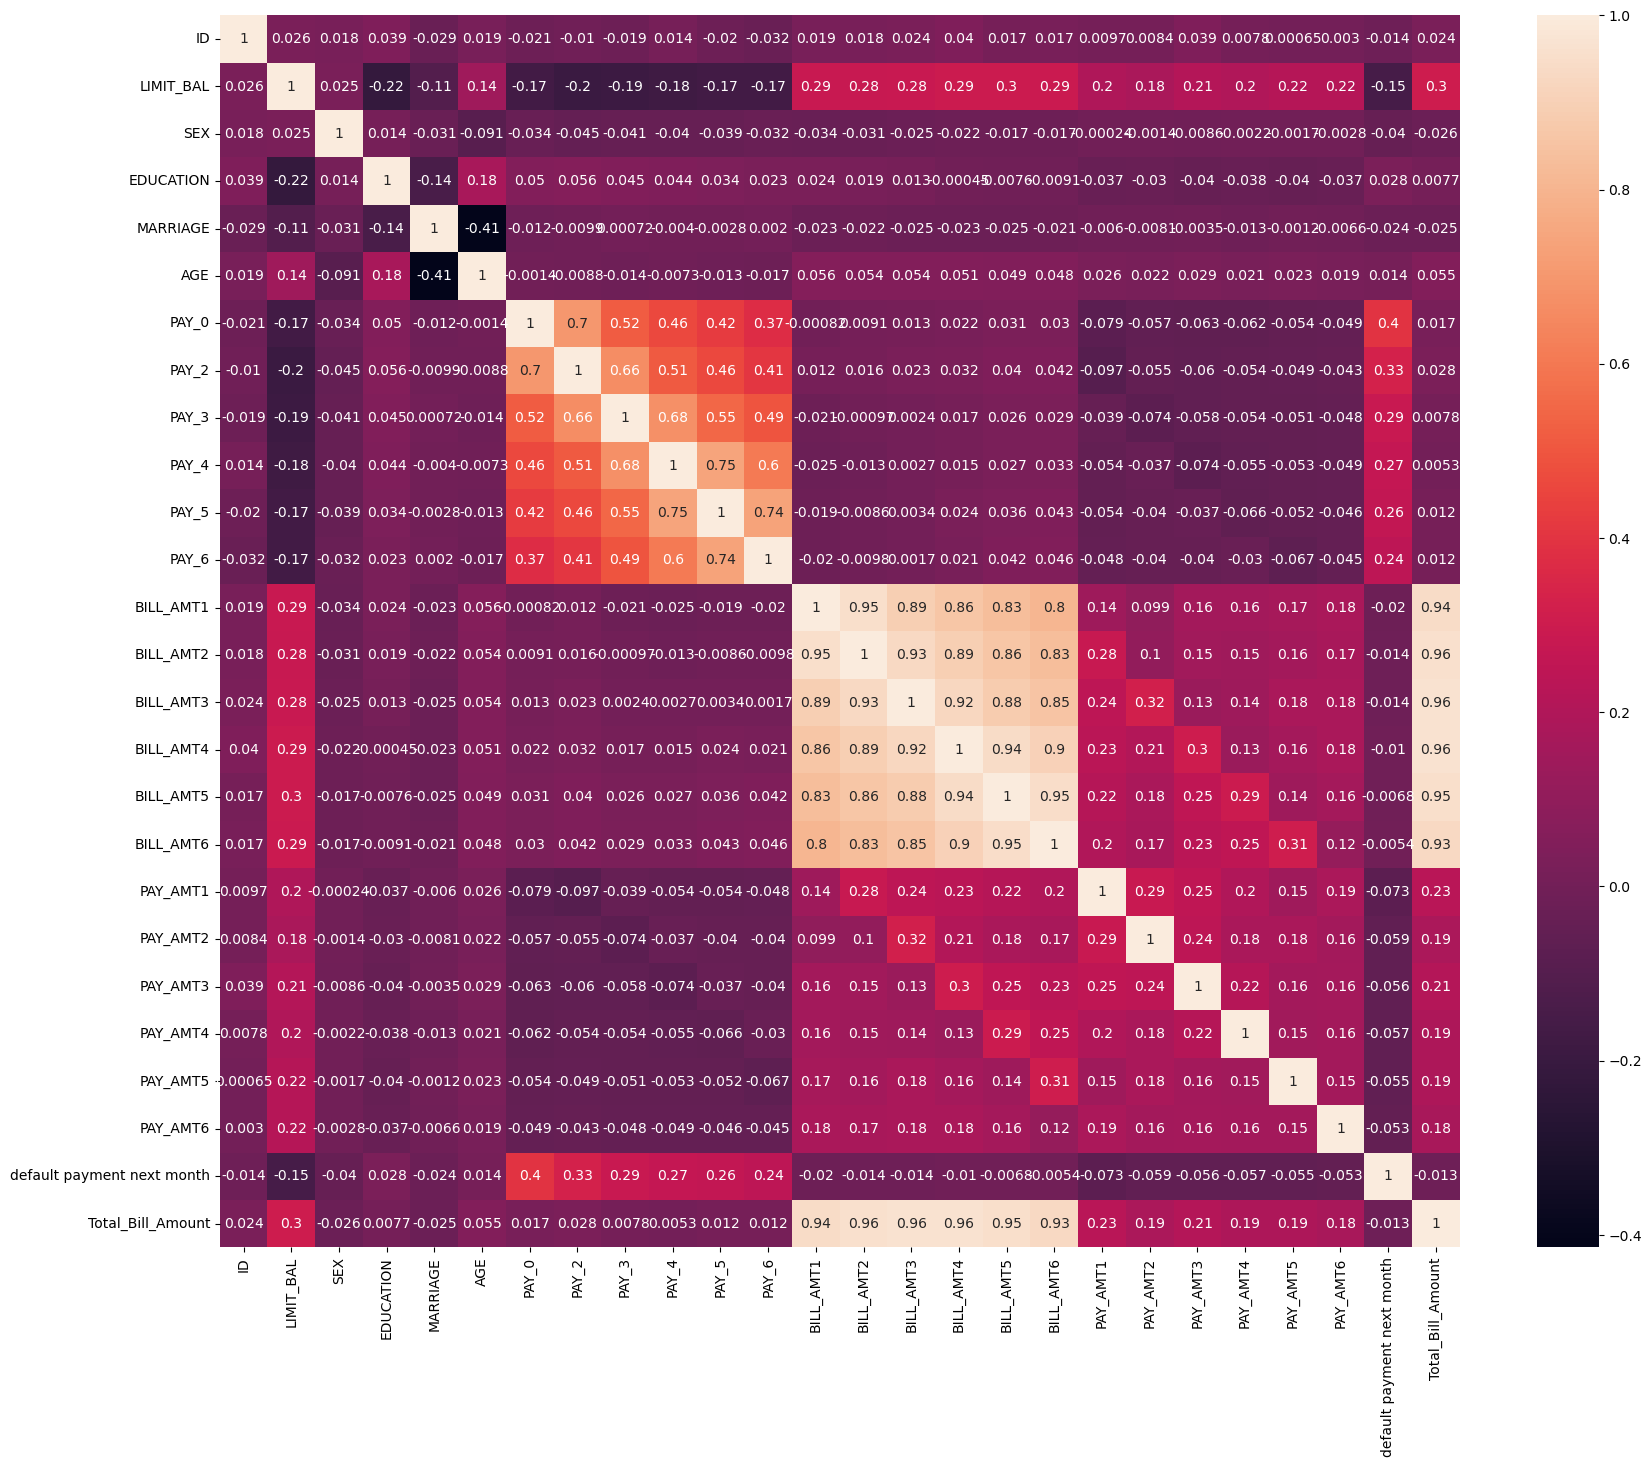

In [28]:
# Checking Correlation
corr = ccdcs.corr()
plt.figure(figsize = (20, 16))
sns.heatmap(corr, annot=True)

In [29]:
corr

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,Total_Bill_Amount
ID,1.000000,0.026179,0.018497,0.039177,-0.029079,0.018678,-0.020978,-0.010001,-0.018820,0.013700,-0.020336,-0.032450,0.019389,0.017982,0.024354,0.040351,0.016705,0.016730,0.009742,0.008406,0.039151,0.007793,0.000652,0.003000,-0.013952,0.023723
LIMIT_BAL,0.026179,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.170745,-0.197136,-0.191323,-0.180629,-0.170045,-0.167820,0.285430,0.278314,0.283236,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520,0.302044
SEX,0.018497,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.034475,-0.044750,-0.041227,-0.039737,-0.038533,-0.032061,-0.033642,-0.031183,-0.024563,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961,-0.025920
EDUCATION,0.039177,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.050180,0.055610,0.045278,0.044117,0.033551,0.023124,0.023581,0.018749,0.013002,-0.000451,-0.007567,-0.009099,-0.037456,-0.030038,-0.039943,-0.038218,-0.040358,-0.037200,0.028006,0.007750
MARRIAGE,-0.029079,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,-0.011724,-0.009915,0.000717,-0.004039,-0.002772,0.002050,-0.023472,-0.021602,-0.024909,-0.023344,-0.025393,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641,-0.024339,-0.024507
AGE,0.018678,0.144713,-0.090874,0.175061,-0.414170,1.000000,-0.001447,-0.008774,-0.014266,-0.007288,-0.013277,-0.016948,0.056239,0.054283,0.053710,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890,0.054981
PAY_0,-0.020978,-0.170745,-0.034475,0.050180,-0.011724,-0.001447,1.000000,0.698389,0.516970,0.460224,0.424473,0.373805,-0.000819,0.009137,0.013307,0.022100,0.030731,0.030201,-0.079177,-0.057189,-0.062620,-0.061886,-0.053784,-0.048733,0.396019,0.017392
PAY_2,-0.010001,-0.197136,-0.044750,0.055610,-0.009915,-0.008774,0.698389,1.000000,0.663529,0.512773,0.462717,0.407086,0.011684,0.015932,0.022950,0.032467,0.040422,0.042222,-0.097475,-0.054838,-0.059865,-0.053981,-0.048714,-0.043099,0.327093,0.028050
PAY_3,-0.018820,-0.191323,-0.041227,0.045278,0.000717,-0.014266,0.516970,0.663529,1.000000,0.678931,0.551430,0.492827,-0.020586,-0.000968,0.002447,0.016579,0.026196,0.028979,-0.039356,-0.073670,-0.057702,-0.053849,-0.050805,-0.048443,0.286999,0.007825
PAY_4,0.013700,-0.180629,-0.039737,0.044117,-0.004039,-0.007288,0.460224,0.512773,0.678931,1.000000,0.745419,0.602875,-0.025184,-0.012569,0.002670,0.014654,0.027239,0.033138,-0.054484,-0.036877,-0.074064,-0.055305,-0.052732,-0.048828,0.269055,0.005291


In [30]:
# Checking high correlations columns
correlation_matrix = ccdcs.corr()

# Setting a correlation threshold
correlation_threshold = 0.65

# Finding columns with high correlation
high_correlation_columns = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            colname = correlation_matrix.columns[i]
            high_correlation_columns.add(colname)
            
print(high_correlation_columns)

{'PAY_5', 'BILL_AMT6', 'Total_Bill_Amount', 'PAY_6', 'PAY_3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT2', 'PAY_4', 'PAY_2', 'BILL_AMT3'}


# Model Building

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, RobustScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, classification_report

X = ccdcs.drop('default payment next month', axis=1)
y = ccdcs['default payment next month']

In [32]:
#Independent Variables
X.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Total_Bill_Amount
0,1,20000,1,2,1,24,2,2,0,0,0,0,3913,3102,689,0,0,0,0,689,0,0,0,0,7704
1,2,120000,1,2,2,26,0,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,17077
2,3,90000,1,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,101653
3,4,50000,1,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,231334
4,5,50000,0,2,1,57,0,0,0,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,109339


In [33]:
# Target Variable
y.head()

0    1
1    1
2    0
3    0
4    0
Name: default payment next month, dtype: int64

# Spliting data into train and test sets 

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [35]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(24000, 25)
(6000, 25)
(24000,)
(6000,)


# Scaling

In [36]:
# Feature scaling using standard scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
# Feature selection using SelectKBest with ANOVA F-statistic
k_best = SelectKBest(score_func=f_classif, k=10)
X_train_selected = k_best.fit_transform(X_train_scaled, y_train)
X_test_selected = k_best.transform(X_test_scaled)

In [38]:
ccdcs['default payment next month'].value_counts()

default payment next month
0    23364
1     6636
Name: count, dtype: int64

# Data is imbalanced we wil use class-weights to balance data

# LogisticRegression

In [39]:
# Training the Logistic Regression with class weight
lr_w = LogisticRegression(class_weight='balanced', max_iter=1000)
lr_w.fit(X_train_selected, y_train)
y_pred_lr_train = lr_w.predict(X_train_selected)

# Making predictions on the test set
y_pred_lr = lr_w.predict(X_test_selected)

# Calculating and checking accuracy
print("Train accuracy:", accuracy_score(y_train, y_pred_lr_train))
print("Test accuracy:" ,accuracy_score(y_test, y_pred_lr))
print("Logistic Regression with Class Weights:")
print(classification_report(y_test, y_pred_lr))

Train accuracy: 0.7780833333333333
Test accuracy: 0.7773333333333333
Logistic Regression with Class Weights:
              precision    recall  f1-score   support

           0       0.87      0.84      0.85      4687
           1       0.49      0.57      0.53      1313

    accuracy                           0.78      6000
   macro avg       0.68      0.70      0.69      6000
weighted avg       0.79      0.78      0.78      6000



In [41]:
print(y_test, y_pred_lr) 

2308     0
22404    0
23397    0
25058    0
2664     1
        ..
2210     0
14144    1
23108    0
25703    0
29171    0
Name: default payment next month, Length: 6000, dtype: int64 [0 0 0 ... 0 1 0]


# RandomForestClassifier

In [41]:
# Training the Random Forest with class weights
rf_w = RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42)
rf_w.fit(X_train_selected, y_train)
y_pred_rf_train = rf_w.predict(X_train_selected)

# Making predictions on the test set
y_pred_rf = rf_w.predict(X_test_selected)

# Calculating and checking accuracy
print("Train accuracy:", accuracy_score(y_train, y_pred_rf_train))
accuracy = accuracy_score(y_test, y_pred_rf)
print("Test accuracy: {:.2f}".format(accuracy))
print("Random Forest Classifier with Class Weights:")
print(classification_report(y_test, y_pred_rf))

Train accuracy: 0.9739583333333334
Test accuracy: 0.80
Random Forest Classifier with Class Weights:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      4687
           1       0.56      0.41      0.47      1313

    accuracy                           0.80      6000
   macro avg       0.70      0.66      0.67      6000
weighted avg       0.78      0.80      0.79      6000



# XGBClassifier

In [43]:
# Calculate the scale_pos_weight value
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

# Training the XGBoost with scale_pos_weight
xgb_weighted = XGBClassifier(scale_pos_weight=scale_pos_weight, use_label_encoder=False, eval_metric='logloss')
xgb_weighted.fit(X_train_selected, y_train)
y_pred_xgb_train = xgb_weighted.predict(X_train_selected)

# Making predictions on the test set
y_pred_xgb = xgb_weighted.predict(X_test_selected)

# Calculating and checking accuracy
print("Train accuracy:", accuracy_score(y_train, y_pred_xgb_train))
print("Test accuracy:" ,accuracy_score(y_test, y_pred_xgb))
print("XGBoost with Class Weights:")
print(classification_report(y_test, y_pred_xgb))

Train accuracy: 0.8256666666666667
Test accuracy: 0.7505
XGBoost with Class Weights:
              precision    recall  f1-score   support

           0       0.88      0.79      0.83      4687
           1       0.45      0.61      0.52      1313

    accuracy                           0.75      6000
   macro avg       0.66      0.70      0.67      6000
weighted avg       0.78      0.75      0.76      6000



# KNeighborsClassifier

In [44]:
# Training the KNeighbors with class weights
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_selected, y_train)
y_pred_knn_train = knn_model.predict(X_train_selected)

# Making predictions on the test set 
y_pred_knn = knn_model.predict(X_test_selected)

# Calculating and Checking accuracy 
print("Train accuracy:", accuracy_score(y_train, y_pred_knn_train))
print("Test accuracy:" ,accuracy_score(y_test, y_pred_knn))
print("K-Nearest Neighbors Classifier:\n", classification_report(y_test, y_pred_knn))


Train accuracy: 0.83875
Test accuracy: 0.7983333333333333
K-Nearest Neighbors Classifier:
               precision    recall  f1-score   support

           0       0.84      0.92      0.88      4687
           1       0.56      0.37      0.44      1313

    accuracy                           0.80      6000
   macro avg       0.70      0.64      0.66      6000
weighted avg       0.78      0.80      0.78      6000



# SVC

In [45]:
# Training the SVM with class weights
svm_weighted = SVC(class_weight='balanced', kernel='linear')
svm_weighted.fit(X_train_selected, y_train)
y_pred_svm_train = svm_weighted.predict(X_train_selected)


# Making predictions on the test set  
y_pred_svm = svm_weighted.predict(X_test_selected)

# Calculating and Checking accuracy
print("Train accuracy:", accuracy_score(y_train, y_pred_svm_train))
print("Test accuracy:" ,accuracy_score(y_test, y_pred_svm))
print("Support Vector Machine (SVM) with Class Weights:")
print(classification_report(y_test, y_pred_svm))

Train accuracy: 0.7824583333333334
Test accuracy: 0.781
Support Vector Machine (SVM) with Class Weights:
              precision    recall  f1-score   support

           0       0.86      0.85      0.86      4687
           1       0.50      0.52      0.51      1313

    accuracy                           0.78      6000
   macro avg       0.68      0.69      0.69      6000
weighted avg       0.78      0.78      0.78      6000



# AdaBoostClassifier

In [46]:
# Training the AdaBoost with class weights
ada_model = AdaBoostClassifier()
sample_weight = compute_sample_weight(class_weight='balanced', y=y_train)
ada_model.fit(X_train_selected, y_train, sample_weight=sample_weight)
y_pred_ada_train = ada_model.predict(X_train_selected)

# Making predictions on the test set
y_pred_ada = ada_model.predict(X_test_selected)

# Calculating and Checking accuracy 
print("Train accuracy:", accuracy_score(y_train, y_pred_ada_train))
print("Test accuracy:" ,accuracy_score(y_test, y_pred_ada))
print("AdaBoost Classifier:\n", classification_report(y_test, y_pred_ada))

Train accuracy: 0.77025
Test accuracy: 0.7665
AdaBoost Classifier:
               precision    recall  f1-score   support

           0       0.88      0.81      0.84      4687
           1       0.47      0.60      0.53      1313

    accuracy                           0.77      6000
   macro avg       0.68      0.71      0.69      6000
weighted avg       0.79      0.77      0.78      6000



# DecisionTreeClassifier

In [47]:
# Training the DecisionTree with class weights
dt_model = DecisionTreeClassifier(class_weight='balanced')
dt_model.fit(X_train_selected, y_train)
y_pred_dt_train = dt_model.predict(X_train_selected)

# Making predictions on the test set
y_pred_dt = dt_model.predict(X_test_selected)

# Calculating and Checking accuracy
print("Train accuracy:", accuracy_score(y_train, y_pred_dt_train))
print("Test accuracy:" ,accuracy_score(y_test, y_pred_dt))
print("Decision Tree Classifier:\n", classification_report(y_test, y_pred_dt))


Train accuracy: 0.9712916666666667
Test accuracy: 0.7223333333333334
Decision Tree Classifier:
               precision    recall  f1-score   support

           0       0.83      0.80      0.82      4687
           1       0.38      0.43      0.40      1313

    accuracy                           0.72      6000
   macro avg       0.61      0.62      0.61      6000
weighted avg       0.74      0.72      0.73      6000

